In [1]:
import pandas as pd
from sklearn.datasets import load_iris

In [2]:
data = load_iris()
df = pd.DataFrame(data =data['data'], columns = data['feature_names'])
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [19]:
from sklearn.model_selection import train_test_split
X = df.copy()
y = data['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 42)

In [22]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(ccp_alpha=0.01, max_depth =2)
clf = clf.fit(X_train, y_train)

In [23]:
clf.get_params()

{'ccp_alpha': 0.01,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': 2,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'random_state': None,
 'splitter': 'best'}

In [24]:
X_test

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
73,6.1,2.8,4.7,1.2
18,5.7,3.8,1.7,0.3
118,7.7,2.6,6.9,2.3
78,6.0,2.9,4.5,1.5
76,6.8,2.8,4.8,1.4
31,5.4,3.4,1.5,0.4
64,5.6,2.9,3.6,1.3
141,6.9,3.1,5.1,2.3
68,6.2,2.2,4.5,1.5
82,5.8,2.7,3.9,1.2


In [25]:
pred = clf.predict(X_test)
pred

array([1, 0, 2, 1, 2, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 0, 0])

In [26]:
pred_proba = clf.predict_proba(X_test)
pred_proba

array([[0.        , 0.97297297, 0.02702703],
       [1.        , 0.        , 0.        ],
       [0.        , 0.11627907, 0.88372093],
       [0.        , 0.97297297, 0.02702703],
       [0.        , 0.11627907, 0.88372093],
       [1.        , 0.        , 0.        ],
       [0.        , 0.97297297, 0.02702703],
       [0.        , 0.11627907, 0.88372093],
       [0.        , 0.97297297, 0.02702703],
       [0.        , 0.97297297, 0.02702703],
       [0.        , 0.11627907, 0.88372093],
       [1.        , 0.        , 0.        ],
       [1.        , 0.        , 0.        ],
       [1.        , 0.        , 0.        ],
       [1.        , 0.        , 0.        ],
       [0.        , 0.97297297, 0.02702703],
       [0.        , 0.11627907, 0.88372093],
       [0.        , 0.97297297, 0.02702703],
       [0.        , 0.97297297, 0.02702703],
       [0.        , 0.11627907, 0.88372093],
       [1.        , 0.        , 0.        ],
       [0.        , 0.11627907, 0.88372093],
       [1.

In [27]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, pred)

0.9666666666666667

In [29]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, pred)

array([[10,  0,  0],
       [ 0,  8,  1],
       [ 0,  0, 11]])

In [30]:
from sklearn.metrics import precision_score
precision_score(y_test, pred, average ='macro')

np.float64(0.9722222222222222)

In [31]:
from sklearn.metrics import recall_score
recall_score(y_test, pred, average='macro')

np.float64(0.9629629629629629)

In [32]:
from sklearn.metrics import classification_report
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      0.89      0.94         9
           2       0.92      1.00      0.96        11

    accuracy                           0.97        30
   macro avg       0.97      0.96      0.97        30
weighted avg       0.97      0.97      0.97        30



In [33]:
feature_names =X.columns
feature_names

Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)'],
      dtype='object')

In [34]:
clf.feature_importances_

array([0., 0., 1., 0.])

In [35]:
feature_importance = pd.DataFrame(clf.feature_importances_, index=feature_names).sort_values(0,ascending =False)
feature_importance

,0
petal length (cm),1.0
sepal length (cm),0.0
sepal width (cm),0.0
petal width (cm),0.0


In [36]:
features = list(feature_importance[feature_importance[0]>0].index)
features

['petal length (cm)']

<Axes: >

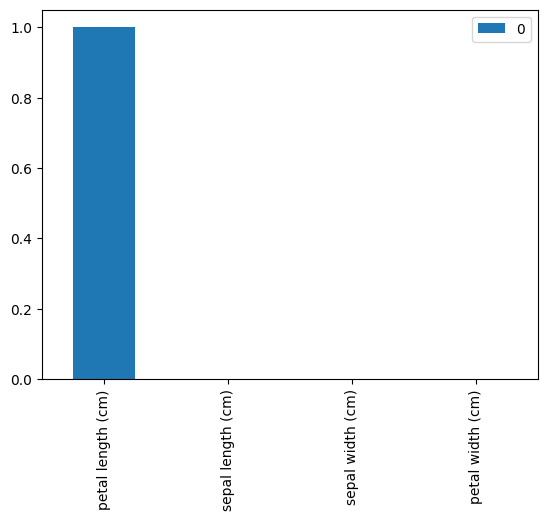

In [37]:
feature_importance.head(10).plot(kind='bar')